<a href="https://colab.research.google.com/github/WagnerLopesCardozo/Otimizacao_Combinatoria_Pesquisa_Operacional/blob/main/PROJETO_Estudo_Teste_de_Grubbs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.stats import zscore
from scipy.stats import norm

# Conjunto de dados fornecido
data = np.array([350, 350, 350, 352, 352, 354, 356, 348, 348, 347, 345, 345, 342, 349, 355, 401, 350, 350, 352, 352, 354, 356, 348, 348, 370, 345, 345, 342, 349])

# Função para calcular a estatística de Grubbs
def grubbs_test(data):
    z_scores = zscore(data)
    max_z = np.max(np.abs(z_scores))
    n = len(data)
    critical_value = (n - 1) / np.sqrt(n) * np.sqrt(norm.ppf((0.975 / (2 * n))))
    g_value = max_z / np.sqrt(1 - (max_z ** 2 / (n - 1)))
    return g_value, critical_value

# Realizando o Teste de Grubbs
g_statistic, critical_value = grubbs_test(data)

# Imprimindo os resultados
print(f'Estatística de Grubbs: {g_statistic}')
print(f'Valor crítico de Grubbs: {critical_value}')

# Tomando decisão com base no valor crítico
if g_statistic > critical_value:
    print('Rejeitar a hipótese nula: Há um possível outlier no conjunto de dados.')
else:
    print('Não há evidência suficiente para rejeitar a hipótese nula: Não há outliers no conjunto de dados.')


Estatística de Grubbs: 9.352358744399831
Valor crítico de Grubbs: nan
Não há evidência suficiente para rejeitar a hipótese nula: Não há outliers no conjunto de dados.


<ipython-input-1-89e12af0a71e>:13: RuntimeWarning: invalid value encountered in sqrt
  critical_value = (n - 1) / np.sqrt(n) * np.sqrt(norm.ppf((0.975 / (2 * n))))


In [5]:
import numpy as np
from scipy.stats import t

# Conjunto de dados fornecido
data = np.array([350, 350, 350, 352, 352, 354, 356, 348, 348, 347, 345, 345, 342, 349, 355, 401, 350, 350, 352, 352, 354, 356, 348, 348, 370, 345, 345, 342, 349])

# Remover duplicatas automaticamente
data = np.unique(data)

# Função para calcular a estatística de Grubbs
def grubbs_test(data):
    n = len(data)

    # Calcular a estatística de Grubbs
    max_value = np.max(data)
    mean_value = np.mean(data)
    std_value = np.std(data)

    g_value = (max_value - mean_value) / std_value

    try:
        # Calcular o valor crítico de Grubbs usando distribuição t de Student
        critical_value = ((n - 1) / np.sqrt(n)) * np.sqrt(t.ppf(1 - 0.05 / (2 * n), n - 2) ** 2 / (n - 2 + t.ppf(1 - 0.05 / (2 * n), n - 2) ** 2))
    except Exception as e:
        print(f"Erro ao calcular o valor crítico: {e}")
        critical_value = np.nan

    return g_value, critical_value

# Realizando o Teste de Grubbs
g_statistic, critical_value = grubbs_test(data)

# Imprimir os resultados
print(f'Estatística de Grubbs: {g_statistic}')
print(f'Valor crítico de Grubbs: {critical_value}')

# Tomando decisão com base no valor crítico
if np.isnan(critical_value):
    print("Não foi possível calcular o valor crítico corretamente.")
else:
    if g_statistic > critical_value:
        print('Rejeitar a hipótese nula: Há um possível outlier no conjunto de dados.')
    else:
        print('Não há evidência suficiente para rejeitar a hipótese nula: Não há outliers no conjunto de dados.')


Estatística de Grubbs: 2.9685430476409
Valor crítico de Grubbs: 2.4115595184316536
Rejeitar a hipótese nula: Há um possível outlier no conjunto de dados.


Estatística de Grubbs: 2.9685430476409
Valor crítico de Grubbs: 2.4115595184316536
Rejeitar a hipótese nula: Há um possível outlier no conjunto de dados.


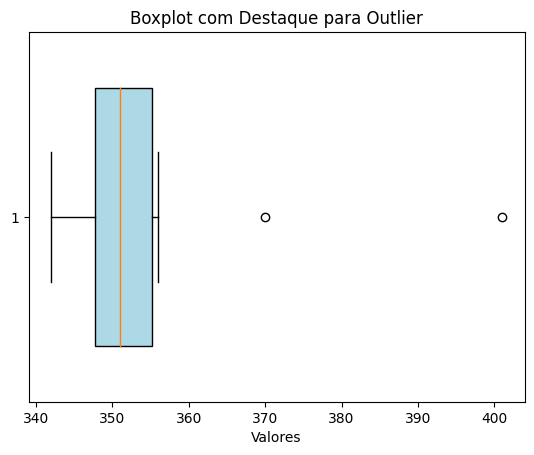

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Conjunto de dados fornecido
data = np.array([350, 350, 350, 352, 352, 354, 356, 348, 348, 347, 345, 345, 342, 349, 355, 401, 350, 350, 352, 352, 354, 356, 348, 348, 370, 345, 345, 342, 349])

# Remover duplicatas automaticamente
data = np.unique(data)

# Função para calcular a estatística de Grubbs
def grubbs_test(data):
    n = len(data)

    # Calcular a estatística de Grubbs
    max_value = np.max(data)
    mean_value = np.mean(data)
    std_value = np.std(data)

    g_value = (max_value - mean_value) / std_value

    try:
        # Calcular o valor crítico de Grubbs usando distribuição t de Student
        critical_value = ((n - 1) / np.sqrt(n)) * np.sqrt(t.ppf(1 - 0.05 / (2 * n), n - 2) ** 2 / (n - 2 + t.ppf(1 - 0.05 / (2 * n), n - 2) ** 2))
    except Exception as e:
        print(f"Erro ao calcular o valor crítico: {e}")
        critical_value = np.nan

    return g_value, critical_value

# Realizando o Teste de Grubbs
g_statistic, critical_value = grubbs_test(data)

# Imprimir os resultados
print(f'Estatística de Grubbs: {g_statistic}')
print(f'Valor crítico de Grubbs: {critical_value}')

# Tomando decisão com base no valor crítico
if np.isnan(critical_value):
    print("Não foi possível calcular o valor crítico corretamente.")
else:
    if g_statistic > critical_value:
        print('Rejeitar a hipótese nula: Há um possível outlier no conjunto de dados.')
    else:
        print('Não há evidência suficiente para rejeitar a hipótese nula: Não há outliers no conjunto de dados.')

# Plotando o boxplot com destaque para outliers na vertical e com caixa retangular
plt.boxplot(data, vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'))
plt.title('Boxplot com Destaque para Outlier')
plt.xlabel('Valores')
plt.show()


Estatística de Grubbs: 2.9685430476409
Valor crítico de Grubbs: 2.4115595184316536
Rejeitar a hipótese nula: Há um possível outlier no conjunto de dados.


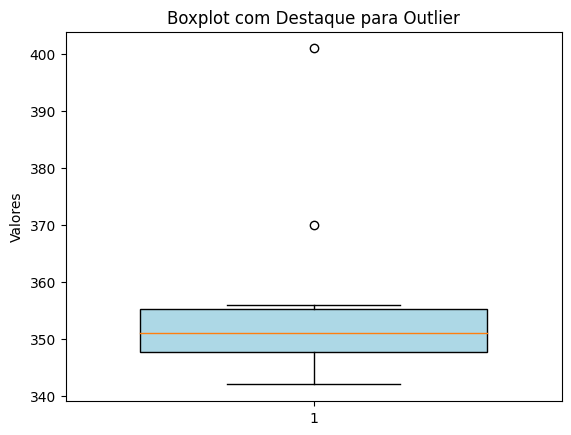

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Conjunto de dados fornecido
data = np.array([350, 350, 350, 352, 352, 354, 356, 348, 348, 347, 345, 345, 342, 349, 355, 401, 350, 350, 352, 352, 354, 356, 348, 348, 370, 345, 345, 342, 349])

# Remover duplicatas automaticamente
data = np.unique(data)

# Função para calcular a estatística de Grubbs
def grubbs_test(data):
    n = len(data)

    # Calcular a estatística de Grubbs
    max_value = np.max(data)
    mean_value = np.mean(data)
    std_value = np.std(data)

    g_value = (max_value - mean_value) / std_value

    try:
        # Calcular o valor crítico de Grubbs usando distribuição t de Student
        critical_value = ((n - 1) / np.sqrt(n)) * np.sqrt(t.ppf(1 - 0.05 / (2 * n), n - 2) ** 2 / (n - 2 + t.ppf(1 - 0.05 / (2 * n), n - 2) ** 2))
    except Exception as e:
        print(f"Erro ao calcular o valor crítico: {e}")
        critical_value = np.nan

    return g_value, critical_value

# Realizando o Teste de Grubbs
g_statistic, critical_value = grubbs_test(data)

# Imprimir os resultados
print(f'Estatística de Grubbs: {g_statistic}')
print(f'Valor crítico de Grubbs: {critical_value}')

# Tomando decisão com base no valor crítico
if np.isnan(critical_value):
    print("Não foi possível calcular o valor crítico corretamente.")
else:
    if g_statistic > critical_value:
        print('Rejeitar a hipótese nula: Há um possível outlier no conjunto de dados.')
    else:
        print('Não há evidência suficiente para rejeitar a hipótese nula: Não há outliers no conjunto de dados.')

# Plotando o boxplot com destaque para outliers na vertical e com caixa retangular
plt.boxplot(data, vert=True, widths=0.7, patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'))
plt.title('Boxplot com Destaque para Outlier')
plt.ylabel('Valores')
plt.show()
